# Chapter 1: Soccer Analytics with Python
Copyright: Clive Beggs 6th March 2023 (Python translation May 31, 2025)

This notebook contains Python code for analyzing soccer data, including EPL champions analysis, managerial records, regression analysis, and betting odds analysis.

## Import Required Libraries
First, let's import all the necessary Python libraries for our analysis.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, chi2_contingency
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Set the style for better-looking plots
plt.style.use('seaborn-v0_8')

# Configure pandas to display all columns
pd.set_option('display.max_columns', None)

## EPL Champions Analysis
Let's analyze the English Premier League champions data from 1992-2021. We'll create both bar and pie charts to visualize the distribution of titles.

In [7]:
# Create data for EPL champions
clubs = ["Arsenal", "Blackburn Rovers", "Chelsea", "Leicester City", 
        "Liverpool", "Man City", "Man United"]
titles = [3, 1, 5, 1, 1, 6, 13]

# Create DataFrame
epl_dat = pd.DataFrame({'Clubs': clubs, 'Titles': titles})
print("EPL Champions (1992-2021):")
print(epl_dat)

EPL Champions (1992-2021):
              Clubs  Titles
0           Arsenal       3
1  Blackburn Rovers       1
2           Chelsea       5
3    Leicester City       1
4         Liverpool       1
5          Man City       6
6        Man United      13


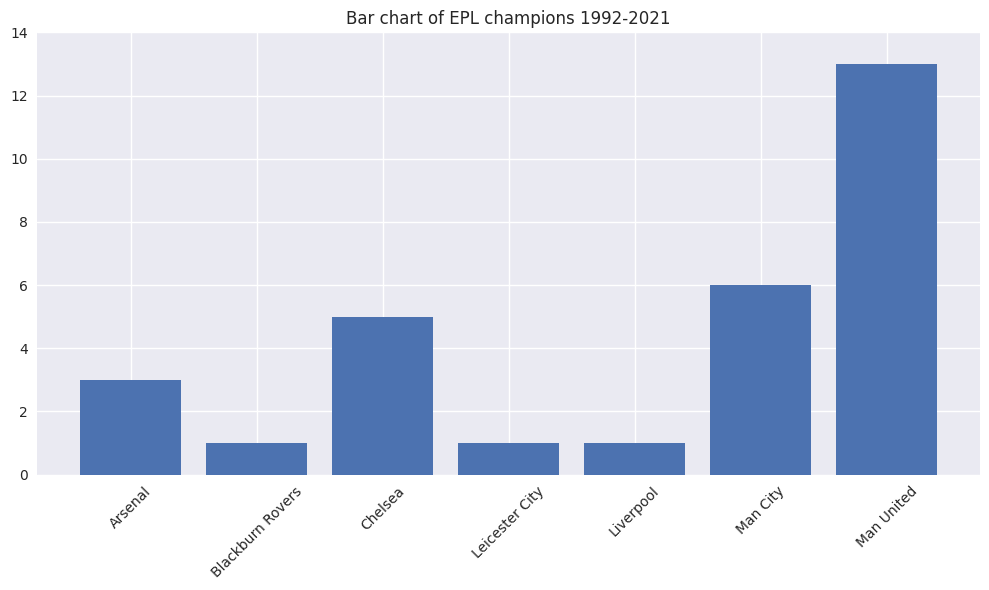

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(epl_dat['Clubs'], epl_dat['Titles'])
plt.ylim(0, 14)
plt.title("Bar chart of EPL champions 1992-2021")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

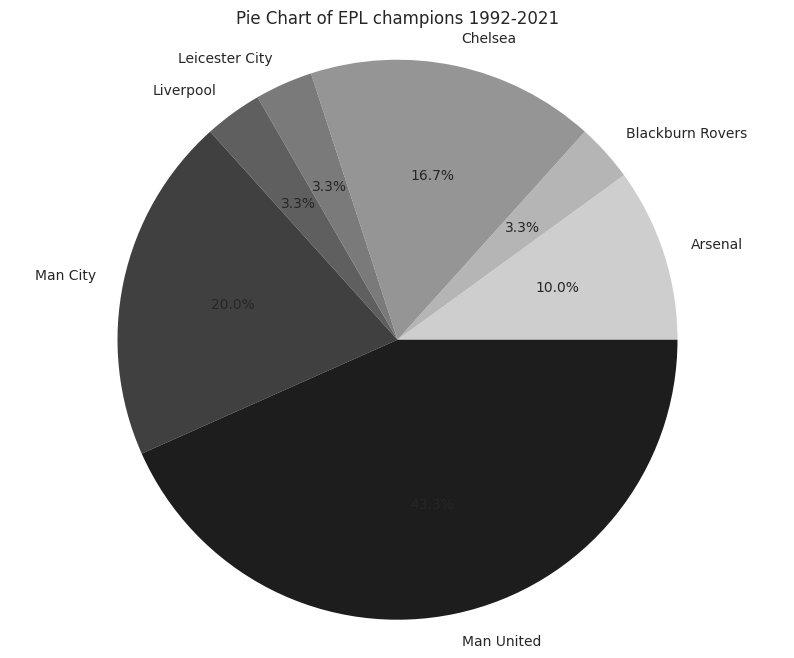

In [9]:
plt.figure(figsize=(10, 8))
colors = plt.cm.Greys(np.linspace(0.3, 0.9, len(epl_dat['Clubs'])))
plt.pie(titles, labels=clubs, colors=colors, autopct='%1.1f%%')
plt.title("Pie Chart of EPL champions 1992-2021")
plt.axis('equal')
plt.show()

## Manchester United Managerial Records
Analyze the performance of different Manchester United managers.

In [10]:
# Create data for managers
manager = ["Ferguson", "Moyes", "van Gaal", "Mourinho", "Solskjaer", "Rangnick"]
wins = [895, 27, 54, 84, 91, 11]
draws = [338, 9, 25, 32, 37, 10]
losses = [267, 15, 24, 28, 40, 8]

# Create DataFrame
mu_record = pd.DataFrame({
    'Manager': manager,
    'Wins': wins,
    'Draws': draws,
    'Losses': losses
})
print("Manchester United Managers Performance:")
print(mu_record)

Manchester United Managers Performance:
     Manager  Wins  Draws  Losses
0   Ferguson   895    338     267
1      Moyes    27      9      15
2   van Gaal    54     25      24
3   Mourinho    84     32      28
4  Solskjaer    91     37      40
5   Rangnick    11     10       8


In [11]:
# Select managers to compare
man1, man2 = "Ferguson", "Rangnick"

# Get their records
manager1 = mu_record[mu_record['Manager'] == man1].iloc[0, 1:].values
manager2 = mu_record[mu_record['Manager'] == man2].iloc[0, 1:].values

# Create contingency table
cont_tab = np.array([manager1, manager2], dtype=float)
contingency_df = pd.DataFrame(
    cont_tab,
    index=['Ferguson', 'Rangnick'],
    columns=['Wins', 'Draws', 'Loses']
)
print("Contingency Table:")
print(contingency_df)

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(cont_tab)
print(f"\nChi-square test results:")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")

Contingency Table:
           Wins  Draws  Loses
Ferguson  895.0  338.0  267.0
Rangnick   11.0   10.0    8.0

Chi-square test results:
Chi-square statistic: 5.5681
p-value: 0.0618


## Regression Analysis: Points vs Shots
Analyze the relationship between points earned and shots taken in the season.

In [12]:
# Create data
points = [61, 55, 41, 39, 67, 44, 59, 28, 59, 66, 69, 86, 74, 45, 23, 43, 62, 26, 65, 45]
shots = [455, 518, 476, 383, 553, 346, 395, 440, 524, 472, 600, 590, 517, 387, 319, 417, 442, 336, 462, 462]

# Create DataFrame
dat2020 = pd.DataFrame({'Points': points, 'Shots': shots})
print("First 6 rows of the dataset:")
print(dat2020.head(6))

First 6 rows of the dataset:
   Points  Shots
0      61    455
1      55    518
2      41    476
3      39    383
4      67    553
5      44    346


Regression Results:
R-squared: 0.6103
Intercept: -21.9996
Coefficient: 0.1646


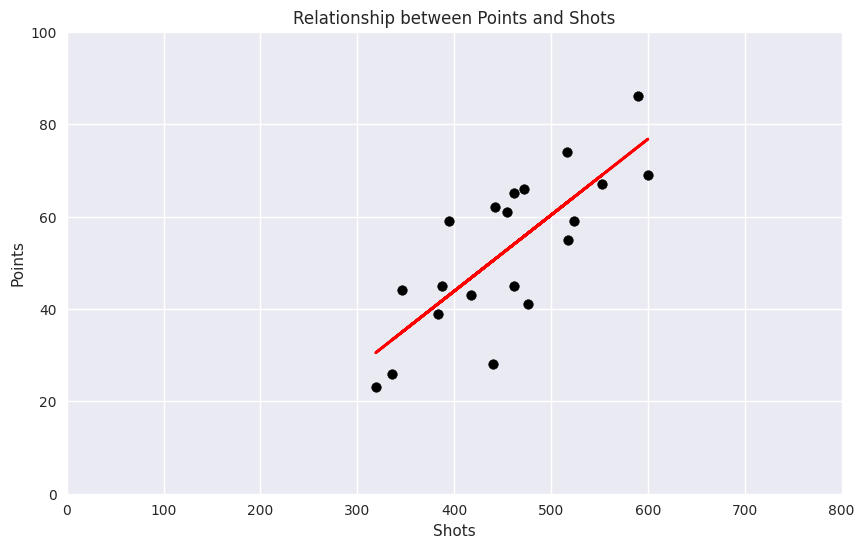


Predictions:
Chelsea (585 shots): 74.30 points
Manchester City (704 shots): 93.89 points
Norwich City (374 shots): 39.57 points


In [13]:
# Prepare data for regression
X = dat2020['Shots'].values.reshape(-1, 1)
y = dat2020['Points'].values

# Build and fit the model
model = LinearRegression()
model.fit(X, y)

# Calculate predictions and R-squared
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

# Print results
print("Regression Results:")
print(f"R-squared: {r2:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Coefficient: {model.coef_[0]:.4f}")

# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(shots, points, color='black', marker='o')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlim(0, 800)
plt.ylim(0, 100)
plt.xlabel('Shots')
plt.ylabel('Points')
plt.title('Relationship between Points and Shots')
plt.show()

# Make predictions
print("\nPredictions:")
print(f"Chelsea (585 shots): {model.predict([[585]])[0]:.2f} points")
print(f"Manchester City (704 shots): {model.predict([[704]])[0]:.2f} points")
print(f"Norwich City (374 shots): {model.predict([[374]])[0]:.2f} points")

## Betting Odds Analysis
Analyze betting odds from William Hill and Pinnacle, calculate implied probabilities and over-round.

In [14]:
# Define odds
wh_hwodds, wh_dodds, wh_awodds = 2.15, 3.30, 3.50  # William Hill odds
p_hwodds, p_dodds, p_awodds = 2.13, 3.61, 3.64    # Pinnacle odds

# Create DataFrame
bet_dat = pd.DataFrame({
    'WH_odds': [wh_hwodds, wh_dodds, wh_awodds],
    'Pin_odds': [p_hwodds, p_dodds, p_awodds]
}, index=['Home win', 'Draw', 'Away win'])

# Calculate probabilities
bet_dat['WH_prob'] = round(1/bet_dat['WH_odds'], 3)
bet_dat['Pin_prob'] = round(1/bet_dat['Pin_odds'], 3)

print("Betting odds and probabilities:")
print(bet_dat)

# Calculate over-rounds
wh_or = bet_dat['WH_prob'].sum() - 1
pin_or = bet_dat['Pin_prob'].sum() - 1

print(f"\nWilliam Hill's over-round: {wh_or:.3f}")
print(f"Pinnacle's over-round: {pin_or:.3f}")

# Calculate potential profit
wager = 10
profit = wager * (wh_hwodds - 1)
print(f"\nProfit from £{wager} wager: £{profit:.2f}")

Betting odds and probabilities:
          WH_odds  Pin_odds  WH_prob  Pin_prob
Home win     2.15      2.13    0.465     0.469
Draw         3.30      3.61    0.303     0.277
Away win     3.50      3.64    0.286     0.275

William Hill's over-round: 0.054
Pinnacle's over-round: 0.021

Profit from £10 wager: £11.50


## FA Cup Draw Simulation
Simulate a random draw for the FA Cup matches.

In [15]:
# Set random seed for reproducibility
np.random.seed(123)

# Create list of teams
teams = list(range(1, 17))

# Create empty DataFrame for results
cup_draw = pd.DataFrame(columns=['HomeTeam', 'AwayTeam'])

# Generate draw
samp_ht = np.random.choice(teams, size=8, replace=False)
remaining_teams = [t for t in teams if t not in samp_ht]
samp_at = np.random.choice(remaining_teams, size=8, replace=False)

# Create DataFrame with results
cup_draw = pd.DataFrame({
    'HomeTeam': samp_ht,
    'AwayTeam': samp_at
})

print("FA Cup Draw Results:")
print(cup_draw)

FA Cup Draw Results:
   HomeTeam  AwayTeam
0         8        13
1        11         4
2         5        15
3         1         7
4         6        14
5        10         2
6         9         3
7        12        16
